In [19]:
import numpy as np
import qevo
from qevo import *
import pickle
from tqdm import tqdm

In [15]:
F = 0.7
N = 3

In [9]:
with open('precomputed.pickle', 'rb') as f:
    #(ind2, IfPsL2, ind3, IfPsL3, ind4, IfPsL4, ind5, IfPsL5, ind6, IfPsL6) = 
    inds = pickle.load(f)[::2][N-2] 

In [44]:
conf = default_config.copy()

conf['N'] = N
conf['MAX_OPS'] = 60
conf['STARTING_OPS'] = 40
conf['POPULATION_SIZE'] = 1000

conf['MAX_GEN'] = 200

conf['WEIGHTS'] = 'yield'
conf['P2'] = 1-1e-8
conf['Mη'] = 1-1e-8

conf['F'] = F

In [30]:
inds_atF = [_.copy(F=F,P2=1-1e-7,Mη=1-1e-7,weights='yield') for _ in tqdm(inds)]
yields = [_.hashing_yield() for _ in tqdm(inds_atF)]

100%|██████████| 38065/38065 [01:32<00:00, 411.18it/s]


In [31]:
inds_atF = sorted(inds_atF, key=lambda _:_.hashing_yield(), reverse=True)

Initializing 10000 individuals. Keeping only 1000 of them.


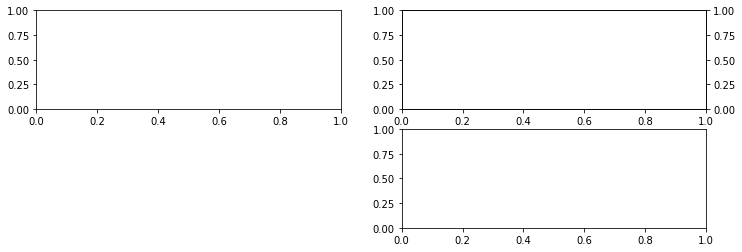

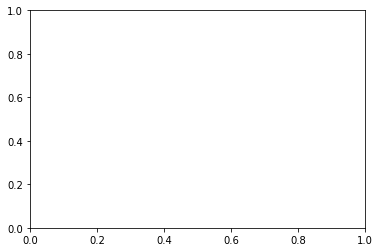

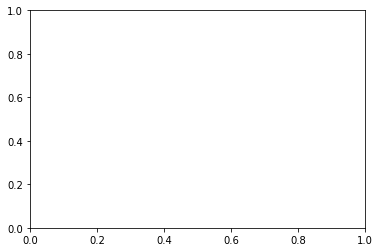

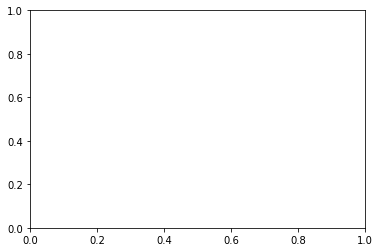

In [32]:
p = Population(**conf)

In [33]:
p.l = inds_atF[:700]+p.l[:300]

In [34]:
p._sort()

In [43]:
conf

OrderedDict([('N', 3),
             ('F', 0.7),
             ('P2', 0.9999999),
             ('Mη', 0.9999999),
             ('WEIGHTS', 'yield'),
             ('STARTING_OPS', 20),
             ('MAX_OPS', 100),
             ('PERMITTED_OPS', [qevo.CNOTPerm, qevo.AMeasurement]),
             ('POPULATION_SIZE', 1000),
             ('STARTING_POP_MULTIPLIER', 10),
             ('MUTANTS_PER_INDIVIDUAL_PER_TYPE', 1),
             ('P_ADD_OPERATION', 0.7),
             ('P_LOSE_OPERATION', 0.9),
             ('P_SWAP_OPERATIONS', 0.8),
             ('P_MUTATE_OPERATIONS', 0.8),
             ('P_SINGLE_OPERATION_MUTATES', 0.1),
             ('PAIRS', 20),
             ('CHILDREN_PER_PAIR', 10),
             ('MAX_GEN', 500)])

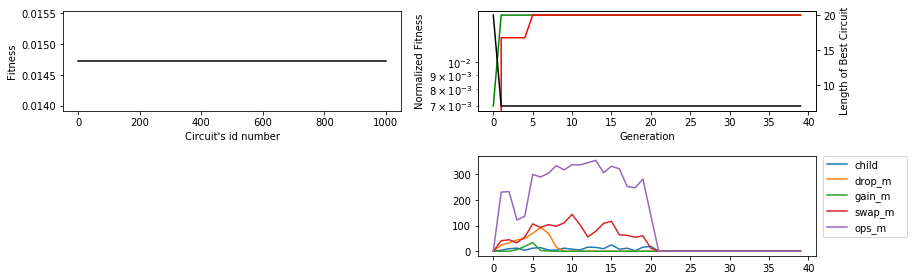

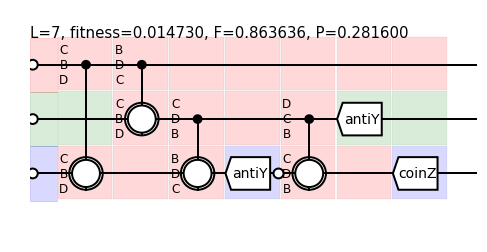

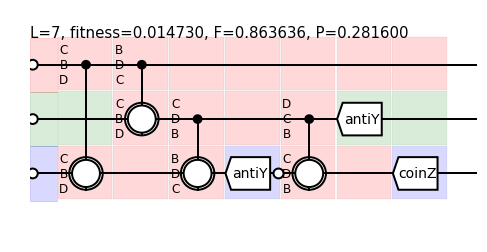

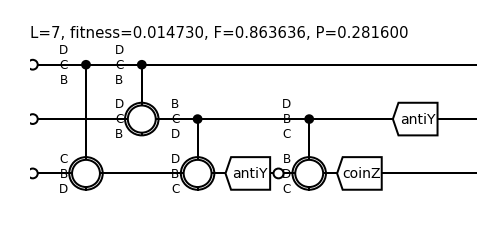

Generation: 39    Population: 1000    Δ: 0.000000e+00
Interrupted by user.


In [35]:
p.run(min_delta=-1)

In [45]:
with open('yield_optim_%s_%s.dump'%(N,F), 'wb') as f:
    pickle.dump(p.l[0], f)